In [1]:
import paddle 
import numpy as np
import matplotlib.pyplot as plt 
import paddle.nn as nn

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


In [2]:
device=paddle.set_device('gpu')

In [3]:
print('loading dataset...')
train_dataset=paddle.text.datasets.Imdb(mode='train')
test_dataset=paddle.text.datasets.Imdb(mode='test')
print('loading finished')

loading dataset...
item    60/20539 [..............................] - ETA: 33s - 2ms/item

Cache file /home/aistudio/.cache/paddle/dataset/imdb/imdb%2FaclImdb_v1.tar.gz not found, downloading https://dataset.bj.bcebos.com/imdb%2FaclImdb_v1.tar.gz 
Begin to download


item 20539/20539 [============================>.] - ETA: 0s - 1ms/item


Download finished


loading finished


In [4]:
word_dict=train_dataset.word_idx
word_dict['<pad>']=len(word_dict)

In [5]:
for k in list(word_dict)[:5]:
    print("{}:{}".format(k.decode('ASCII'),word_dict[k]))
print("...")
for k in list(word_dict)[-5:]:
    print("{}:{}".format(k if isinstance(k,str) else k.decode("ASCII"),word_dict[k]))
print("total {} words".format(len(word_dict)))

the:0
and:1
a:2
of:3
to:4
...
virtual:5143
warriors:5144
widely:5145
<unk>:5146
<pad>:5147
total 5148 words


In [6]:
vocab_size=len(word_dict)+1
emb_size=256
seq_len=200
batch_size=32
epochs=2
pad_id=word_dict['<pad>']
classes=['negative','positive']

def ids_to_str(ids):
    sens=[]
    for k in ids:
        w=list(word_dict)[k]
        sens.append(w if isinstance(w,str) else w.decode('utf-8'))
    return ' '.join(sens)

sent =train_dataset.docs[0]
label=train_dataset.labels[0]

print('sentence id list :')
print(sent)
print("label:",label)

print("--------------------------------------------------------")
print("sentencs :")
print(ids_to_str(sent))
print('label:',classes[label])

sentence id list :
[5146, 43, 71, 6, 1092, 14, 0, 878, 130, 151, 5146, 18, 281, 747, 0, 5146, 3, 5146, 2165, 37, 5146, 46, 5, 71, 4089, 377, 162, 46, 5, 32, 1287, 300, 35, 203, 2136, 565, 14, 2, 253, 26, 146, 61, 372, 1, 615, 5146, 5, 30, 0, 50, 3290, 6, 2148, 14, 0, 5146, 11, 17, 451, 24, 4, 127, 10, 0, 878, 130, 43, 2, 50, 5146, 751, 5146, 5, 2, 221, 3727, 6, 9, 1167, 373, 9, 5, 5146, 7, 5, 1343, 13, 2, 5146, 1, 250, 7, 98, 4270, 56, 2316, 0, 928, 11, 11, 9, 16, 5, 5146, 5146, 6, 50, 69, 27, 280, 27, 108, 1045, 0, 2633, 4177, 3180, 17, 1675, 1, 2571]
label: 0
--------------------------------------------------------
sentencs :
<unk> has much in common with the third man another <unk> film set among the <unk> of <unk> europe like <unk> there is much inventive camera work there is an innocent american who gets emotionally involved with a woman he doesnt really understand and whose <unk> is all the more striking in contrast with the <unk> br but id have to say that the third man has a mo

# 破大防,下面的因为蓝屏全没了,现在copy的百度的

In [7]:
# 读取数据归一化处理
def create_padded_dataset(dataset):
    padded_sents = []
    labels = []
    for batch_id, data in enumerate(dataset):
        sent, label = data[0], data[1]
        padded_sent = np.concatenate([sent[:seq_len], [pad_id] * (seq_len - len(sent))]).astype('int32')
        padded_sents.append(padded_sent)
        labels.append(label)
    return np.array(padded_sents), np.array(labels)

# 对train、test数据进行实例化
train_sents, train_labels = create_padded_dataset(train_dataset)
test_sents, test_labels = create_padded_dataset(test_dataset)

# 查看数据大小及举例内容
print(train_sents.shape)
print(train_labels.shape)
print(test_sents.shape)
print(test_labels.shape)

for sent in train_sents[:3]:
    print(ids_to_str(sent))

(25000, 200)
(25000, 1)
(25000, 200)
(25000, 1)
<unk> has much in common with the third man another <unk> film set among the <unk> of <unk> europe like <unk> there is much inventive camera work there is an innocent american who gets emotionally involved with a woman he doesnt really understand and whose <unk> is all the more striking in contrast with the <unk> br but id have to say that the third man has a more <unk> storyline <unk> is a bit disjointed in this respect perhaps this is <unk> it is presented as a <unk> and making it too coherent would spoil the effect br br this movie is <unk> <unk> in more than one sense one never sees the sun shine grim but intriguing and frightening <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <p

In [8]:
class IMDBDataset(paddle.io.Dataset):
    '''
    继承paddle.io.Dataset类进行封装数据
    '''
    def __init__(self, sents, labels):
        self.sents = sents
        self.labels = labels
    
    def __getitem__(self, index):
        data = self.sents[index]
        label = self.labels[index]

        return data, label

    def __len__(self):
        return len(self.sents)
    
train_dataset = IMDBDataset(train_sents, train_labels)
test_dataset = IMDBDataset(test_sents, test_labels)

train_loader = paddle.io.DataLoader(train_dataset, return_list=True,
                                    shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = paddle.io.DataLoader(test_dataset, return_list=True,
                                    shuffle=True, batch_size=batch_size, drop_last=True)

In [9]:
import paddle.nn as nn
import paddle

# 定义RNN网络
class MyRNN(paddle.nn.Layer):
    def __init__(self):
        super(MyRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, 256)
        self.rnn = nn.SimpleRNN(256, 256, num_layers=2, direction='forward',dropout=0.5)
        self.linear = nn.Linear(in_features=256*2, out_features=2)
        self.dropout = nn.Dropout(0.5)
    

    def forward(self, inputs):
        emb = self.dropout(self.embedding(inputs))
        #output形状大小为[batch_size,seq_len,num_directions * hidden_size]
        #hidden形状大小为[num_layers * num_directions, batch_size, hidden_size]
        #把前向的hidden与后向的hidden合并在一起
        output, hidden = self.rnn(emb)
        hidden = paddle.concat((hidden[-2,:,:], hidden[-1,:,:]), axis = 1)
        #hidden形状大小为[batch_size, hidden_size * num_directions]
        hidden = self.dropout(hidden)
        return self.linear(hidden) 

In [10]:
# 可视化定义
def draw_process(title,color,iters,data,label):
    plt.title(title, fontsize=24)
    plt.xlabel("iter", fontsize=20)
    plt.ylabel(label, fontsize=20)
    plt.plot(iters, data,color=color,label=label) 
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
# 对模型进行封装
def train(model):
    model.train()
    opt = paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters())
    steps = 0
    Iters, total_loss, total_acc = [], [], []

    for epoch in range(epochs):
        for batch_id, data in enumerate(train_loader):
            steps += 1
            sent = data[0]
            label = data[1]
            
            logits = model(sent)
            loss = paddle.nn.functional.cross_entropy(logits, label)
            acc = paddle.metric.accuracy(logits, label)

            if batch_id % 500 == 0:  # 500个epoch输出一次结果
                Iters.append(steps)
                total_loss.append(loss.numpy()[0])
                total_acc.append(acc.numpy()[0])

                print("epoch: {}, batch_id: {}, loss is: {}".format(epoch, batch_id, loss.numpy()))
            
            loss.backward()
            opt.step()
            opt.clear_grad()

        # evaluate model after one epoch
        model.eval()
        accuracies = []
        losses = []
        
        for batch_id, data in enumerate(test_loader):
            
            sent = data[0]
            label = data[1]

            logits = model(sent)
            loss = paddle.nn.functional.cross_entropy(logits, label)
            acc = paddle.metric.accuracy(logits, label)
            
            accuracies.append(acc.numpy())
            losses.append(loss.numpy())
        
        avg_acc, avg_loss = np.mean(accuracies), np.mean(losses)

        print("[validation] accuracy: {}, loss: {}".format(avg_acc, avg_loss))
        
        model.train()

        # 保存模型
        paddle.save(model.state_dict(),str(epoch)+"_model_final.pdparams")
    
    # 可视化查看
    draw_process("trainning loss","red",Iters,total_loss,"trainning loss")
    draw_process("trainning acc","green",Iters,total_acc,"trainning acc")
        


epoch: 0, batch_id: 0, loss is: [0.6951699]
epoch: 0, batch_id: 500, loss is: [0.68548703]
[validation] accuracy: 0.4925576150417328, loss: 0.6941216588020325
epoch: 1, batch_id: 0, loss is: [0.7777183]
epoch: 1, batch_id: 500, loss is: [0.7532429]
[validation] accuracy: 0.4986395537853241, loss: 0.6974977254867554
epoch: 2, batch_id: 0, loss is: [0.7232014]
epoch: 2, batch_id: 500, loss is: [0.7631279]
[validation] accuracy: 0.49219751358032227, loss: 0.7096545696258545
epoch: 3, batch_id: 0, loss is: [0.7353083]
epoch: 3, batch_id: 500, loss is: [0.73626196]
[validation] accuracy: 0.500920295715332, loss: 0.7008309960365295
epoch: 4, batch_id: 0, loss is: [0.73683876]
epoch: 4, batch_id: 500, loss is: [0.76356745]
[validation] accuracy: 0.5017205476760864, loss: 0.7516682147979736
epoch: 5, batch_id: 0, loss is: [0.8193828]
epoch: 5, batch_id: 500, loss is: [0.76610863]
[validation] accuracy: 0.4897567331790924, loss: 0.7317607402801514
epoch: 6, batch_id: 0, loss is: [0.757277]
epoc

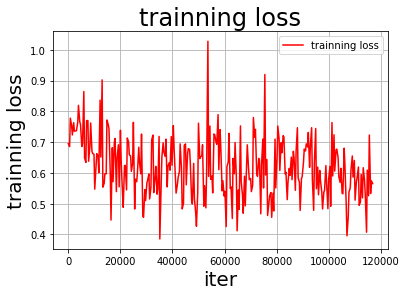

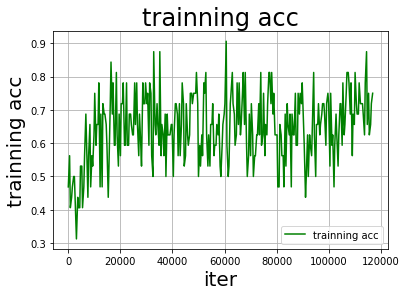

In [17]:
epochs=150
model = MyRNN()
train(model)

# 破大防,上面的因为蓝屏全没了,现在copy的百度的



In [ ]:
model_state_dict=paddle.load('147_model_final.pdparams')
model=MyRNN()
model.set_state_dict(model_state_dict)
model.eval()
label_map={0:'negative',1:'positive'}
eval_accs=[]
eval_losses=[]
samples=[]
predictions=[]

for batch_id,data in enumerate(test_loader):
    x=data[0]
    y=data[1]
    pred=model(x)

    for idx,probs in enumerate(pred):
        prediction=label_map[np.argmax(probs)]
        samples.append(x[idx].numpy())
        predictions.append(prediction)

    loss=paddle.nn.functional.cross_entropy(pred,y)
    acc=paddle.metric.accuracy(pred,y)

    eval_accs.append(acc.numpy()[0])
    eval_losses.append(loss.numpy()[0])



In [ ]:
avg_acc,avg_loss=np.mean(eval_accs),np.mean(eval_losses)
print("[validation] accuracy:{},loss:{}".format(avg_acc,avg_loss))
ind=0
print('数据:{}\n 情感:{}'.format(ids_to_str(samples[ind]),predictions[ind]))

In [28]:

'''
模型评估
'''
model_state_dict = paddle.load('145_model_final.pdparams')  # 导入模型
model = MyRNN()
model.set_state_dict(model_state_dict) 
model.eval()
accuracies = []
losses = []

for batch_id, data in enumerate(test_loader):
    
    sent = data[0]
    label = data[1]

    logits = model(sent)
    loss = paddle.nn.functional.cross_entropy(logits, label)
    acc = paddle.metric.accuracy(logits, label)
    
    accuracies.append(acc.numpy())
    losses.append(loss.numpy())

avg_acc, avg_loss = np.mean(accuracies), np.mean(losses)
print("[validation] accuracy: {}, loss: {}".format(avg_acc, avg_loss))

[validation] accuracy: 0.6318421959877014, loss: 0.6986320614814758
